<a href="https://colab.research.google.com/github/fettahyildizz/Deep-Learning/blob/main/Hand%20sign%20MNIST%20Database%20Classification/Hand_sign_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras


In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
train_df = pd.read_csv('sign_mnist_train.csv')
valid_df = pd.read_csv('sign_mnist_valid.csv')


In [ ]:
train_label = train_df.pop('label')
test_label = valid_df.pop('label')


In [ ]:
train_dataset = train_df.to_numpy()
test_dataset = valid_df.to_numpy()


We reshape one image to 28x28 just to visualize it.

3


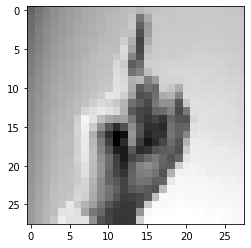

In [ ]:
plt.imshow(train_dataset[0,:].reshape((28,28)), cmap='gray')
print(np.argmax(train_label[0]))

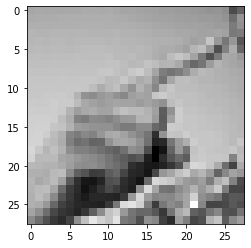

In [ ]:
plt.imshow(train_dataset[1,:].reshape((28,28)), cmap='gray')

Since all datas are flattened, we don't need that preprocessing.

In [ ]:
normalizer = keras.layers.experimental.preprocessing.Normalization()
normalizer.adapt(train_dataset)

train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)


To be able to detect edges, we need 28x28 image. We reshape it to 28x28 format.

In [ ]:
train_dataset = train_dataset.reshape((-1,28,28,1))
test_dataset = test_dataset.reshape((-1,28,28,1))


In [ ]:
model = keras.Sequential([
                          #normalizer,
                          Conv2D(75,kernel_size=(3,3),strides=1,padding='same',activation='relu',
                                 input_shape=(28,28,1)),
                          keras.layers.BatchNormalization(),
                          MaxPool2D((2,2),strides=2,padding='same'),
                          
                          Conv2D(50,kernel_size=(3,3),strides=1,padding='same',activation='relu'),
                          Dropout(0.2),
                          keras.layers.BatchNormalization(),
                          MaxPool2D((2,2),strides=2,padding='same'),

                          Conv2D(25,kernel_size=(3,3),strides=1,padding='same',activation='relu'),
                          keras.layers.BatchNormalization(),
                          MaxPool2D((2,2),strides=2,padding='same'),

                          keras.layers.Flatten(),
                          Dense(512,activation='relu'),
                          Dropout(0.3),

                          Dense(units=24, activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization_39 (Batc (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout_25 (Dropout)         (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_40 (Batc (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 7, 7, 50)        

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(train_dataset,train_label, epochs=20, verbose=1, validation_split=0.1)

Epoch 1/20
773/773 [==============================] - 87s 111ms/step - loss: 0.8792 - accuracy: 0.7447 - val_loss: 0.0966 - val_accuracy: 0.9694
Epoch 2/20
773/773 [==============================] - 86s 111ms/step - loss: 0.0286 - accuracy: 0.9906 - val_loss: 0.0334 - val_accuracy: 0.9916
Epoch 3/20
773/773 [==============================] - 86s 111ms/step - loss: 0.0125 - accuracy: 0.9960 - val_loss: 0.1224 - val_accuracy: 0.9687
Epoch 4/20
773/773 [==============================] - 86s 111ms/step - loss: 0.0087 - accuracy: 0.9975 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 5/20
 79/773 [==>...........................] - ETA: 1:15 - loss: 0.0044 - accuracy: 0.9978

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(test_dataset, test_label)

225/225 [==============================] - 5s 23ms/step - loss: 0.1778 - accuracy: 0.9576


[0.17782022058963776, 0.957612931728363]